#### Importing libraries and data files

In [13]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [14]:
# Reading data files
train = pd.read_csv("mortality_train.csv")
test = pd.read_csv("mortality_test.csv")
train_tgan=pd.read_csv("mortality_train_tgan.csv")
train_ctgan=pd.read_csv("mortality_train_ctgan.csv")

#### Data Correction

In [15]:
train_tgan=train_tgan.round(0)
train_tgan[train_tgan < 0] = 0

train_ctgan=train_ctgan.round(0)
train_ctgan[train_ctgan < 0] = 0

#### Selecting only features

In [16]:
original=train.iloc[:,1:19]
tgan=train_tgan.iloc[:,1:19]
ctgan=train_ctgan.iloc[:,1:19]

#### Standardize features

In [17]:
scaler_1 = StandardScaler()
scaler_1.fit(original)
original_scaled=scaler_1.transform(original)

scaler_2 = StandardScaler()
scaler_2.fit(tgan)
tgan_scaled=scaler_2.transform(tgan)

scaler_3 = StandardScaler()
scaler_3.fit(ctgan)
ctgan_scaled=scaler_3.transform(ctgan)

#### Kmeans - Run iteratiosn to identify right numbe rof clusters

In [ ]:
# Original
wcss_original = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(original_scaled)
    wcss_original.append(kmeans.inertia_)
    
# TGAN
wcss_tgan = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(tgan_scaled)
    wcss_tgan.append(kmeans.inertia_)

# CTGAN
wcss_ctgan = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(ctgan_scaled)
    wcss_ctgan.append(kmeans.inertia_)

#### Elbow plot for Original vs TGAN vs CTGAN

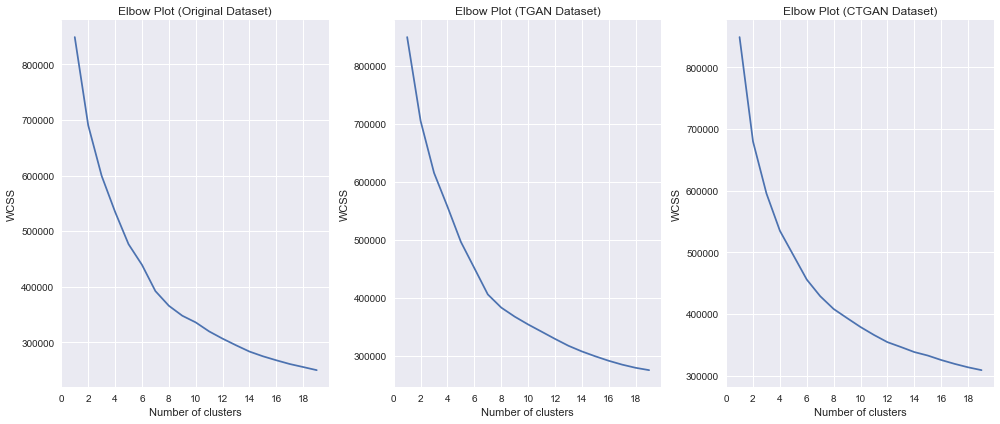

In [19]:
plt.figure(figsize = [14, 6])
plt.style.use('seaborn')
# Plot 1
plt.subplot(131)
plt.plot(range(1, 20), wcss_original)
plt.title('Elbow Plot (Original Dataset)')
plt.xticks(np.arange(0,20,2))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
# Plot 2
plt.subplot(132)
plt.plot(range(1, 20), wcss_tgan)
plt.title('Elbow Plot (TGAN Dataset)')
plt.xticks(np.arange(0,20,2))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
# Plot 3
plt.subplot(133)
plt.plot(range(1, 20), wcss_ctgan)
plt.title('Elbow Plot (CTGAN Dataset)')
plt.xticks(np.arange(0,20,2))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
# Layout of plots
plt.tight_layout()
plt.show()

#### Kmeans- Create clusters

In [20]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(original_scaled)
original['clusters'] = kmeans.labels_

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(tgan_scaled)
tgan['clusters'] = kmeans.labels_

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(ctgan_scaled)
ctgan['clusters'] = kmeans.labels_

#### Visualize data

In [21]:
original_means=original.groupby(['clusters']).mean()
tgan_means=tgan.groupby(['clusters']).mean()
ctgan_means=ctgan.groupby(['clusters']).mean()

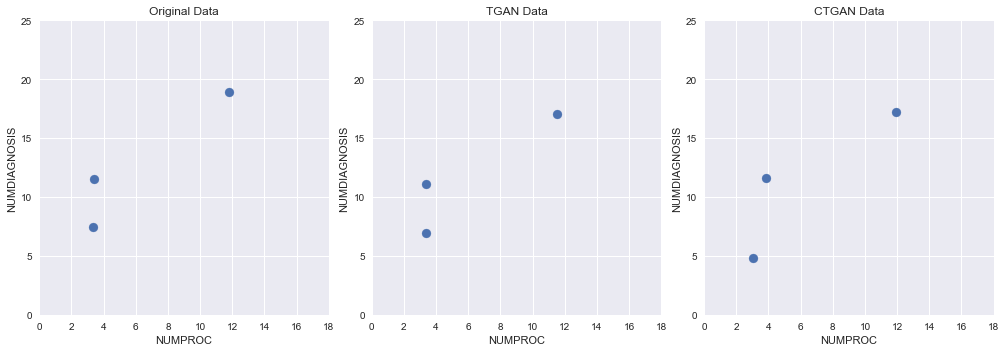

In [22]:
plt.figure(figsize = [14, 5])
plt.style.use('seaborn')
# Plot 1
plt.subplot(131)
plt.title('Original Data')
plt.scatter(original_means['NUMPROC'],
            original_means['NUMDIAGNOSIS'],
            s=80)
plt.xlim(0,18)
plt.ylim(0,25)
plt.xlabel('NUMPROC')
plt.ylabel('NUMDIAGNOSIS')
# Plot 2
plt.subplot(132)
plt.title('TGAN Data')
plt.scatter(tgan_means['NUMPROC'],
            tgan_means['NUMDIAGNOSIS'],
            s=80)
plt.xlim(0,18)
plt.ylim(0,25)
plt.xlabel('NUMPROC')
plt.ylabel('NUMDIAGNOSIS')
# Plot 3
plt.subplot(133)
plt.title('CTGAN Data')
plt.scatter(ctgan_means['NUMPROC'],
            ctgan_means['NUMDIAGNOSIS'],
            s=80)
plt.xlim(0,18)
plt.ylim(0,25)
plt.xlabel('NUMPROC')
plt.ylabel('NUMDIAGNOSIS')

plt.tight_layout()
plt.show()